Install and import the relavant packages

In [1]:
%matplotlib inline

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

Upload and examine the dataset

In [6]:
df = pd.read_csv("micro_ct_dataset.csv")

In [7]:
df.head()

,Stain,Hindgut_vol,Hindgut_CSA,Hindgut_PTC,Hindgut_PI,Midgut_vol,Midgut_CSA,Midgut_PTC,Midgut_PI,Forgut_vol,...,SG_CSA,SG_PTC,SG_PI,brain_vol,brain_CSA,brain_PTC,brain_PI,thorax_width,head_width,cuticle_width
0,Lugols,130385.76,7809.14,0.44,30.0,59202.00,4599.00,0.58,34.0,48658.43,...,200.17,0.58,99.0,29874.0,1338.80,0.68,194.0,155.390,114.061,9.220
1,Lugols,192083.76,10020.79,0.57,63.0,505665.10,4111.30,0.60,36.0,32553.38,...,568.84,0.70,90.0,2441752.2,11853.95,0.71,233.0,165.148,107.787,9.220
2,Lugols,158043.56,8941.74,0.69,48.0,43397.68,4034.58,0.53,21.0,42016.80,...,378.04,0.75,110.0,1054826.0,7586.42,0.67,227.0,163.150,110.023,9.055
3,Lugols,134732.63,7981.56,0.61,51.0,56080.30,4407.11,0.62,36.0,37205.66,...,445.44,0.73,98.0,148511.0,10738.92,0.80,210.0,152.778,88.837,20.616
4,Lugols,167689.59,9159.24,0.56,65.0,7254.20,5270.73,0.54,44.0,42510.00,...,313.43,0.87,96.0,115060.1,8613.29,0.72,204.0,148.000,105.546,19.000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stain          60 non-null     object 
 1   Hindgut_vol    60 non-null     float64
 2   Hindgut_CSA    60 non-null     float64
 3   Hindgut_PTC    60 non-null     float64
 4   Hindgut_PI     60 non-null     float64
 5   Midgut_vol     60 non-null     float64
 6   Midgut_CSA     60 non-null     float64
 7   Midgut_PTC     60 non-null     float64
 8   Midgut_PI      60 non-null     float64
 9   Forgut_vol     60 non-null     float64
 10  Forgut_CSA     60 non-null     float64
 11  Forgut_PTC     60 non-null     float64
 12  Forgut_PI      60 non-null     float64
 13  SG_vol         60 non-null     float64
 14  SG_CSA         60 non-null     float64
 15  SG_PTC         60 non-null     float64
 16  SG_PI          60 non-null     float64
 17  brain_vol      60 non-null     float64
 18  brain_CSA   

Select all columns except 'Stain' for plotting

In [9]:
numeric_columns = df.select_dtypes(include='float64').columns

Set up the layout of the plots

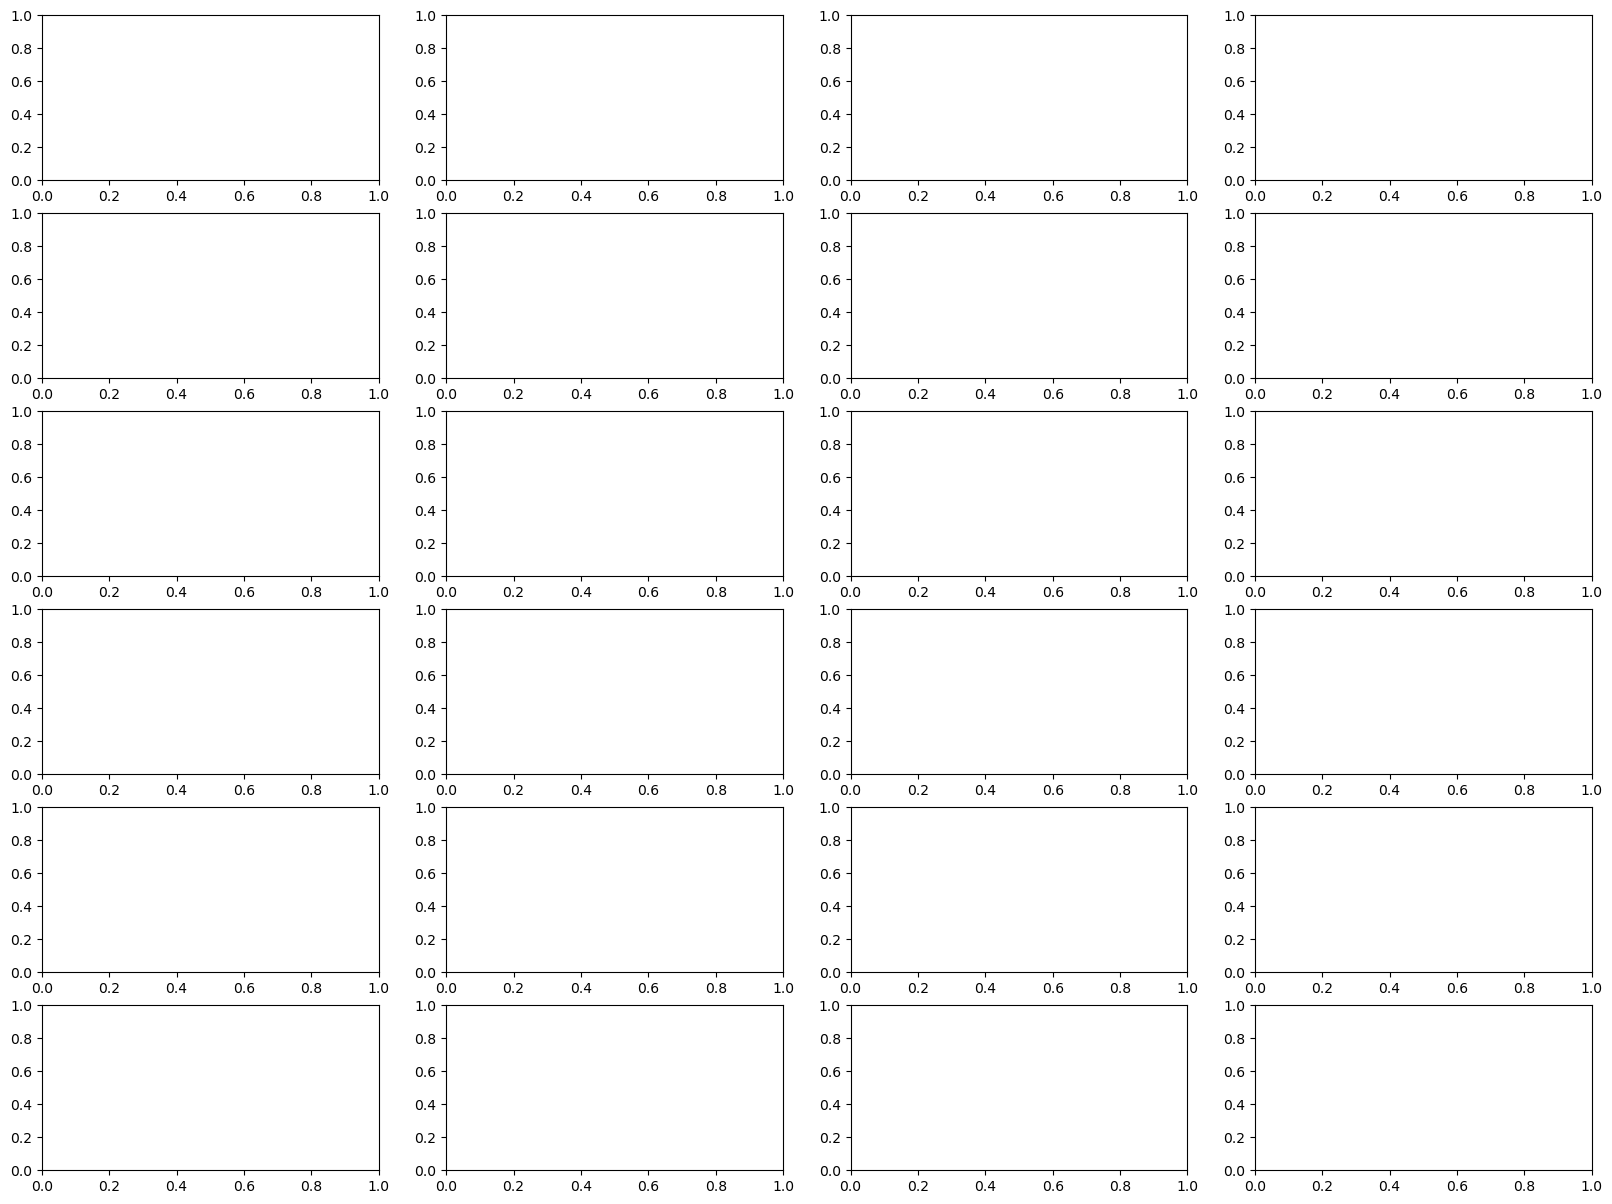

In [10]:
rows = 6
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))

Flatten the axes array to easily iterate

In [11]:
axes = axes.flatten()

Plot a histogram for each numeric column

In [12]:
for i, column in enumerate(numeric_columns):
    df[column].plot(kind='hist', bins=15, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].set_facecolor('white')

Adjust layout to avoid overlap

In [13]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

Remove any unused subplots (in case there are fewer columns than subplots)

In [14]:
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

Adjust layout to avoid overlap between subplots

In [15]:
fig.tight_layout()  # Tighten the layout of the figure

Show the plot

(<Figure size 640x480 with 1 Axes>, <Axes: >)

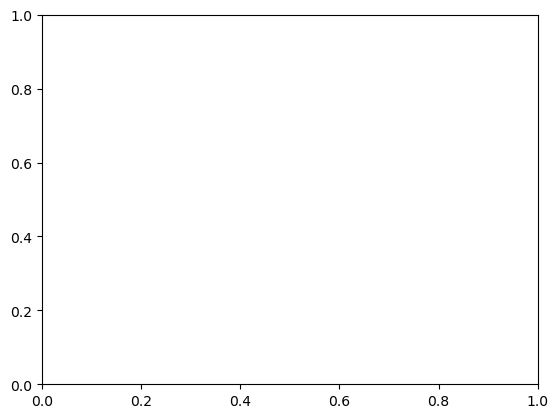

In [16]:
plt.subplots()

In [17]:
plt.show()

Kruskal-Wallis Test of pobabilistic tissue contrasts

In [18]:
from scipy.stats import kruskal

Subset the columns for the test

In [19]:
variables = ['Hindgut_PTC', 'Midgut_PTC', 'Forgut_PTC', 'SG_PTC', 'brain_PTC']

Group the data by 'Stain' and create lists of values for each variable per group

In [20]:
grouped_data = [df.groupby('Stain')[var].apply(list) for var in variables]

Perform Kruskal-Wallis test for each variable

In [21]:
for i, var in enumerate(variables):
    stat, p_value = kruskal(*grouped_data[i])
    print(f'Kruskal-Wallis test for {var}: H-statistic = {stat:.4f}, p-value = {p_value:.4f}')

Kruskal-Wallis test for Hindgut_PTC: H-statistic = 5.0913, p-value = 0.0784
Kruskal-Wallis test for Midgut_PTC: H-statistic = 20.8712, p-value = 0.0000
Kruskal-Wallis test for Forgut_PTC: H-statistic = 32.0225, p-value = 0.0000
Kruskal-Wallis test for SG_PTC: H-statistic = 10.3725, p-value = 0.0056
Kruskal-Wallis test for brain_PTC: H-statistic = 35.4032, p-value = 0.0000


Post-hoc Dunn’s Test

In [22]:
pip install scikit-posthocs

Note: you may need to restart the kernel to use updated packages.


In [23]:
import scikit_posthocs as sp

Combine the PTC variables into a single dataframe with corresponding 'Stain' labels

In [24]:
ptc_data = pd.melt(df, id_vars=['Stain'], value_vars=['Hindgut_PTC', 'Midgut_PTC', 'Forgut_PTC', 'SG_PTC', 'brain_PTC'], 
                   var_name='Gut_Type', value_name='PTC_Value')

Drop any rows with NaN values in either 'Stain' or 'PTC_Value'

In [25]:
ptc_data_clean = ptc_data.dropna(subset=['Stain', 'PTC_Value'])

 Perform Dunn's post-hoc test

In [26]:
posthoc = sp.posthoc_dunn(ptc_data_clean, val_col='PTC_Value', group_col='Stain', p_adjust='bonferroni')

In [27]:
print(posthoc)

                   Lugols   Lugols_PTA1   Lugols_PTA2
Lugols       1.000000e+00  6.686097e-07  1.452593e-09
Lugols_PTA1  6.686097e-07  1.000000e+00  8.881137e-01
Lugols_PTA2  1.452593e-09  8.881137e-01  1.000000e+00


Conduct MANOVA Tests of cross sectional area measurements

In [28]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [29]:
from statsmodels.multivariate.manova import MANOVA

Define the dependent variables (the CSA variables) and the independent variable ('Stain')

In [30]:
dependent_vars = ['Hindgut_CSA', 'Midgut_CSA', 'Forgut_CSA', 'SG_CSA', 'brain_CSA']
independent_var = 'Stain'

Drop rows with any missing values in the selected columns

In [31]:
df_clean = df.dropna(subset=[independent_var] + dependent_vars)

Perform MANOVA test

In [32]:
manova = MANOVA.from_formula(f'{"+".join(dependent_vars)} ~ {independent_var}', data=df_clean)
manova_result = manova.mv_test()

In [33]:
print(manova_result)

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0546 5.0000 53.0000 183.4572 0.0000
         Pillai's trace  0.9454 5.0000 53.0000 183.4572 0.0000
 Hotelling-Lawley trace 17.3073 5.0000 53.0000 183.4572 0.0000
    Roy's greatest root 17.3073 5.0000 53.0000 183.4572 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         Stain          Value   Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.1517 10.0000 106.0000 16.6138 0.0000
         Pillai's trace 1.0929 10.0000 108.0000 13.0118 0.0000
 Hotelling-

Post-hoc Test (Tukey's HSD)

In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Run Tukey's HSD post-hoc test for each dependent variable

In [35]:
for var in dependent_vars:
    tukey = pairwise_tukeyhsd(endog=df_clean[var], groups=df_clean[independent_var], alpha=0.05)
    print(f'\nTukey HSD results for {var}:')
    print(tukey)


Tukey HSD results for Hindgut_CSA:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1      group2   meandiff p-adj    lower      upper   reject
-------------------------------------------------------------------
     Lugols Lugols_PTA1  284.434 0.9085 -1354.2574 1923.1254  False
     Lugols Lugols_PTA2 4306.313    0.0  2667.6216 5945.0044   True
Lugols_PTA1 Lugols_PTA2 4021.879    0.0  2383.1876 5660.5704   True
-------------------------------------------------------------------

Tukey HSD results for Midgut_CSA:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1      group2   meandiff p-adj    lower      upper   reject
-------------------------------------------------------------------
     Lugols Lugols_PTA1 3429.783    0.0  1675.3594 5184.2066   True
     Lugols Lugols_PTA2 3095.853 0.0002  1341.4294 4850.2766   True
Lugols_PTA1 Lugols_PTA2  -333.93  0.891 -2088.3536 1420.4936  False
---------------------------------------------

Define the dependent variables (the vol variables) and the independent variable ('Stain')

In [36]:
dependent_vars = ['Hindgut_vol', 'Midgut_vol', 'Forgut_vol', 'SG_vol', 'brain_vol']
independent_var = 'Stain'

Drop rows with any missing values in the selected columns

In [37]:
df_clean = df.dropna(subset=[independent_var] + dependent_vars)

MONOVA test

In [38]:
manova = MANOVA.from_formula(f'{"+".join(dependent_vars)} ~ {independent_var}', data=df_clean)
manova_result = manova.mv_test()

In [39]:
print(manova_result)

                  Multivariate linear model
                                                              
--------------------------------------------------------------
         Intercept        Value  Num DF  Den DF F Value Pr > F
--------------------------------------------------------------
            Wilks' lambda 0.2956 5.0000 53.0000 25.2556 0.0000
           Pillai's trace 0.7044 5.0000 53.0000 25.2556 0.0000
   Hotelling-Lawley trace 2.3826 5.0000 53.0000 25.2556 0.0000
      Roy's greatest root 2.3826 5.0000 53.0000 25.2556 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         Stain          Value   Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.1601 10.0000 106.0000 15.8879 0.0000
         Pillai's trace 1.1270 10.0000 108.0000 13.9425 0.0000
 Hotelling-

Tukey's posthoc test

In [40]:
for var in dependent_vars:
    tukey = pairwise_tukeyhsd(endog=df_clean[var], groups=df_clean[independent_var], alpha=0.05)
    print(f'\nTukey HSD results for {var}:')
    print(tukey)


Tukey HSD results for Hindgut_vol:
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
   group1      group2     meandiff  p-adj     lower       upper    reject
-------------------------------------------------------------------------
     Lugols Lugols_PTA1  -4946.5185 0.9742 -59553.5385  49660.5015  False
     Lugols Lugols_PTA2  126005.898    0.0   71398.878  180612.918   True
Lugols_PTA1 Lugols_PTA2 130952.4165    0.0  76345.3965 185559.4365   True
-------------------------------------------------------------------------

Tukey HSD results for Midgut_vol:
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
   group1      group2    meandiff  p-adj     lower       upper    reject
------------------------------------------------------------------------
     Lugols Lugols_PTA1 82139.6755 0.0081  18600.3024 145679.0486   True
     Lugols Lugols_PTA2 75043.7015 0.0168  11504.3284 138583.0746   True
Lugols_PTA1 Lugols_PTA2  -7095.974  0.961 -706

MANOVA Tests of Volume measurements

Define the dependent and independent variables

In [41]:
dependent_vars = ['Hindgut_PI', 'Midgut_PI', 'Forgut_PI', 'SG_PI', 'brain_PI']
independent_var = 'Stain'

In [42]:
df_clean = df.dropna(subset=[independent_var] + dependent_vars)

MANOVA test

In [43]:
manova = MANOVA.from_formula(f'{"+".join(dependent_vars)} ~ {independent_var}', data=df_clean)
manova_result = manova.mv_test()

In [44]:
print(manova_result)

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda   0.0062 5.0000 53.0000 1692.0303 0.0000
         Pillai's trace   0.9938 5.0000 53.0000 1692.0303 0.0000
 Hotelling-Lawley trace 159.6255 5.0000 53.0000 1692.0303 0.0000
    Roy's greatest root 159.6255 5.0000 53.0000 1692.0303 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
           Stain          Value   Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
            Wilks' lambda 0.6312 10.0000 106.0000  2.7425 0.0048
           Pillai's trace 0.4039 10.0000 108.

Tukey's Posthoc test

In [45]:
for var in dependent_vars:
    tukey = pairwise_tukeyhsd(endog=df_clean[var], groups=df_clean[independent_var], alpha=0.05)
    print(f'\nTukey HSD results for {var}:')
    print(tukey)


Tukey HSD results for Hindgut_PI:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
     Lugols Lugols_PTA1     0.75 0.9647 -6.3156 7.8156  False
     Lugols Lugols_PTA2     2.25  0.725 -4.8156 9.3156  False
Lugols_PTA1 Lugols_PTA2      1.5 0.8664 -5.5656 8.5656  False
-------------------------------------------------------------

Tukey HSD results for Midgut_PI:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
     Lugols Lugols_PTA1      7.9 0.0039  2.2458 13.5542   True
     Lugols Lugols_PTA2      5.8 0.0432  0.1458 11.4542   True
Lugols_PTA1 Lugols_PTA2     -2.1 0.6464 -7.7542  3.5542  False
--------------------------------------------------------------

Tukey HSD results for Forgut_PI:
     Multiple Comparis

Additional Analyses

Install Necessary Libraries

In [46]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


 GPA (Generalized Procrustes Analysis) and PCA (Principal Component Analysis)

In [47]:
from sklearn.decomposition import PCA
from scipy.spatial import procrustes

Extract only the Float64 columns (variables)

In [48]:
float_columns = df.select_dtypes(include=['float64']).dropna()

Standardize the data (mean=0, variance=1) for GPA and PCA

In [49]:
float_columns_standardized = (float_columns - float_columns.mean()) / float_columns.std()

Generalized Procrustes Analysis (GPA) - pairwise approach
Use the scipy procrustes function to align the matrices pairwise

In [50]:
def generalized_procrustes_analysis(data):
    # Ensure we have more than one unique point
    unique_data = data.drop_duplicates()
    if len(unique_data) < 2:
        raise ValueError("Input matrices must contain >1 unique points")

    # Use the first observation as the reference
    ref_matrix = unique_data.iloc[0].values.reshape(1, -1)
    aligned_matrices = [ref_matrix]
    
    for i in range(1, len(unique_data)):
        # Get the current matrix to align
        current_matrix = unique_data.iloc[i].values.reshape(1, -1)
        # Perform procrustes analysis
        _, mtx2, _ = procrustes(ref_matrix, current_matrix)
        aligned_matrices.append(mtx2)

    return np.vstack(aligned_matrices)

In [51]:
gpa_result = generalized_procrustes_analysis(float_columns_standardized)

ValueError: Input matrices must contain >1 unique points

In [52]:
print("GPA Result Shape:", gpa_result.shape)

NameError: name 'gpa_result' is not defined

PCA Analysis

In [53]:
pca = PCA()
pca_result = pca.fit(float_columns_standardized)

Get the explained variance ratio (importance of each feature)

In [54]:
explained_variance_ratio = pca.explained_variance_ratio_

Create a DataFrame to plot PCA results

In [55]:
pca_df = pd.DataFrame({'Feature': float_columns.columns, 'Relative Importance': explained_variance_ratio})

Plot the Relative Importance against Feature (variables)

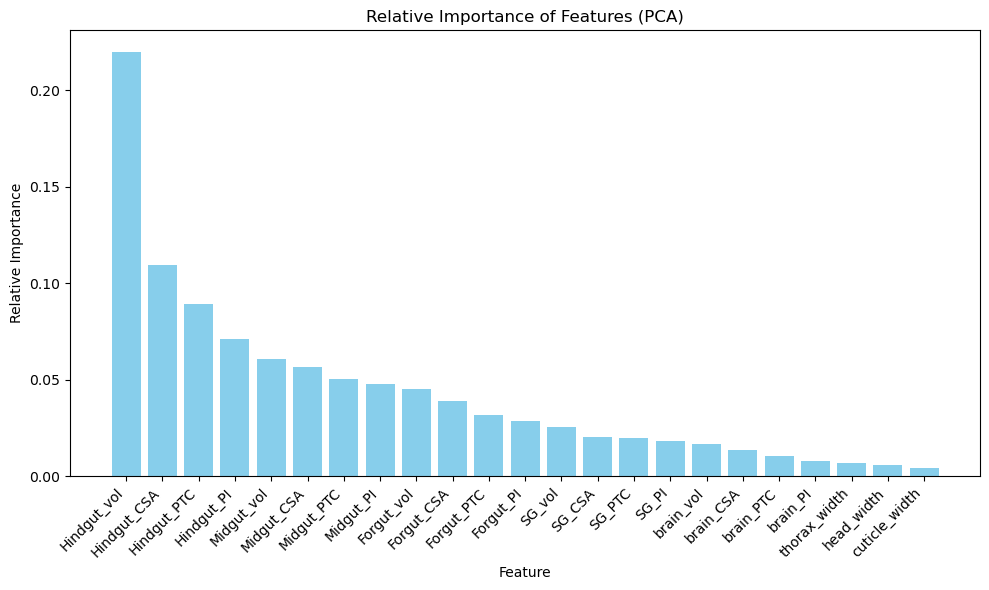

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(pca_df['Feature'], pca_df['Relative Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Relative Importance')
plt.title('Relative Importance of Features (PCA)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Box plots of PTC values

Import seaborn

In [57]:
import seaborn as sns

Filter the dataframe to include only the relevant Stain categories and PTC variables

In [58]:
filtered_df = df[df['Stain'].isin(['Lugols', 'Lugols_PTA1', 'Lugols_PTA2'])]

Melt the dataframe to transform it into long format for seaborn plotting

In [59]:
ptc_columns = ['Hindgut_PTC', 'Midgut_PTC', 'Forgut_PTC', 'SG_PTC', 'brain_PTC']
melted_df = pd.melt(filtered_df, id_vars=['Stain'], value_vars=ptc_columns, 
                    var_name='PTC_Type', value_name='PTC_Value')

Map the old PTC_Type names to new descriptive labels

In [60]:
label_mapping = {
    'Hindgut_PTC': 'hindgut',
    'Midgut_PTC': 'midgut',
    'Forgut_PTC': 'forgut',
    'SG_PTC': 'salivary gland',
    'brain_PTC': 'brain'
}
melted_df['PTC_Type'] = melted_df['PTC_Type'].map(label_mapping)

Create the box plots

Text(0, 0.5, 'PTC Value')

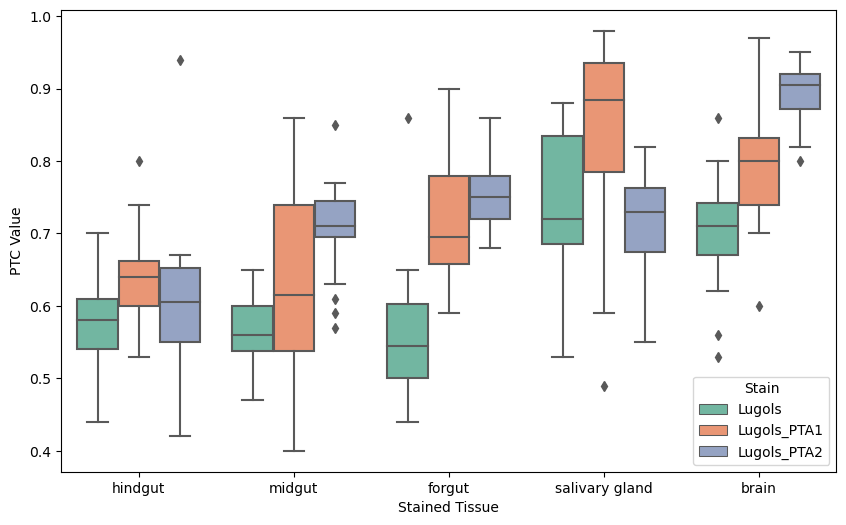

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PTC_Type', y='PTC_Value', hue='Stain', data=melted_df, palette='Set2')
plt.xlabel('Stained Tissue')
plt.ylabel('PTC Value')

Text(0, 0.5, 'PTC Value')

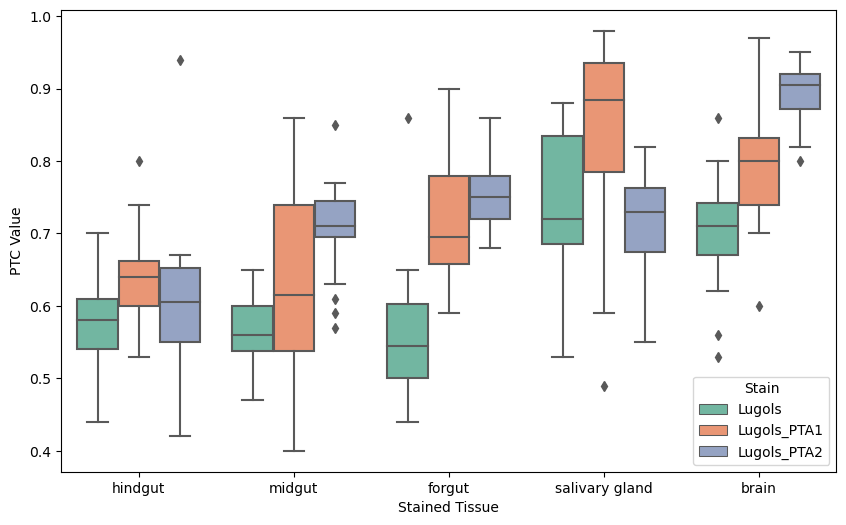

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PTC_Type', y='PTC_Value', hue='Stain', data=melted_df, palette='Set2')
plt.xlabel('Stained Tissue')
plt.ylabel('PTC Value')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

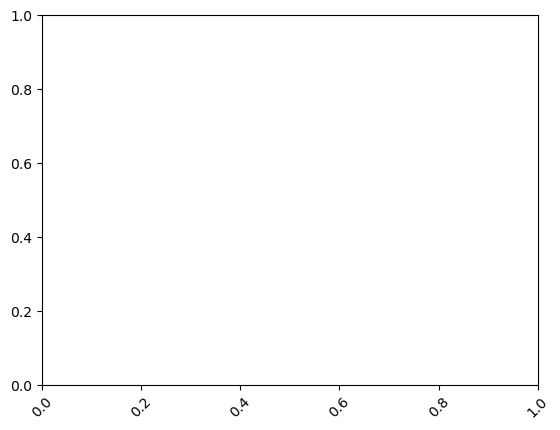

In [63]:
# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

In [64]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [65]:
import numpy as np

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [68]:
import seaborn as sns

In [69]:
# Standardization
scaler = StandardScaler()

In [70]:
pca = PCA(n_components=2)

In [71]:
# Select the relevant columns
selected_columns = [
    'Hindgut_vol', 'Hindgut_CSA', 'Hindgut_PTC', 'Hindgut_PI',
    'Midgut_vol', 'Midgut_CSA', 'Midgut_PTC', 'Midgut_PI',
    'Forgut_vol', 'Forgut_CSA', 'Forgut_PTC', 'Forgut_PI'
]

Drop rows with missing values in the selected columns

In [72]:
df_selected = df[selected_columns].dropna()

Standardize the data

In [73]:
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_selected)

In [74]:
principal_components = pca.fit_transform(df_standardized)

Create a dataframe for PC1 and PC2

In [75]:
pc_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

Print the explained variance ratio

In [76]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]:.2f}")
print(f"Explained variance by PC2: {explained_variance[1]:.2f}")

Explained variance by PC1: 0.24
Explained variance by PC2: 0.13


Display first few rows of the PC1 and PC2 values

In [77]:
print(pc_df.head())

        PC1       PC2
0  3.320245  6.259882
1 -0.286118  0.001672
2  2.782610 -0.105977
3  2.445011 -0.079856
4  1.652252 -1.379476


PCA Biplot

Get the loadings (contributions of each feature to PC1 and PC2)

In [78]:
selected_columns = [
    'Hindgut_vol', 'Hindgut_CSA', 'Hindgut_PTC', 'Hindgut_PI',
    'Midgut_vol', 'Midgut_CSA', 'Midgut_PTC', 'Midgut_PI',
    'Forgut_vol', 'Forgut_CSA', 'Forgut_PTC', 'Forgut_PI'
]

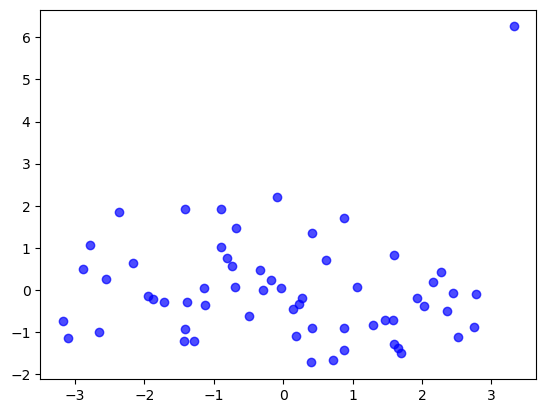

In [79]:
# Scatter plot of PC1 vs PC2
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.7, color='blue', label='Data points')

In [80]:
loadings = pca.components_.T

In [81]:
# Check shape to confirm it worked
print("PCA Shape:", principal_components.shape)

PCA Shape: (60, 2)


Create the biplot

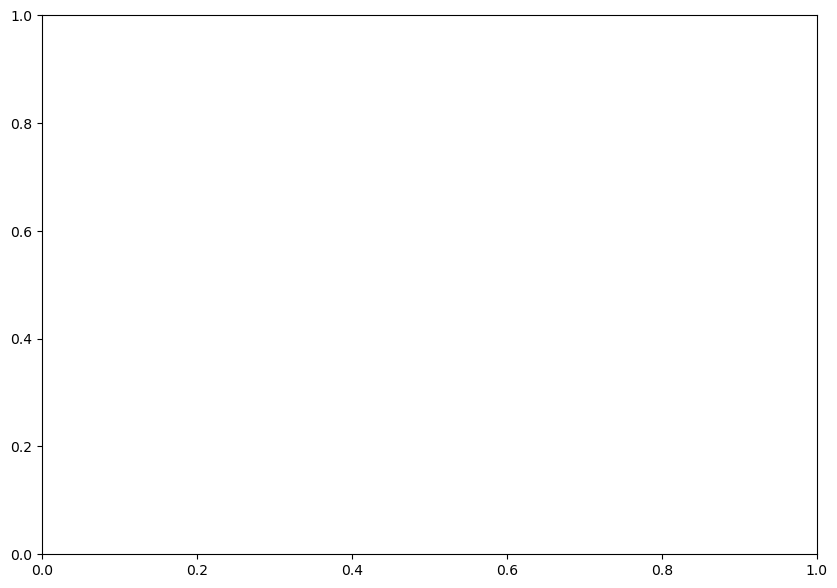

In [82]:
fig, ax = plt.subplots(figsize=(10, 7))

In [83]:
# Scatter plot of PC1 vs PC2
ax.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.7, color='blue', label='Data points')

Add feature vectors (arrows)

In [84]:
feature_labels = selected_columns
for i, feature in enumerate(feature_labels):
    ax.arrow(0, 0, loadings[i, 0] * 3, loadings[i, 1] * 3, color='red', alpha=0.7, head_width=0.1)
    ax.text(loadings[i, 0] * 3.2, loadings[i, 1] * 3.2, feature, color='black', fontsize=12)

Add Labels and Title

In [85]:
ax.set_xlabel("PC1", fontsize=14)
ax.set_ylabel("PC2", fontsize=14)
ax.set_title("Biplot of PC1 vs PC2", fontsize=16)
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)
ax.grid(True, linestyle='--', alpha=0.5)

In [86]:
plt.show()

In [87]:
# Create a fresh figure
plt.figure(figsize=(10, 7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

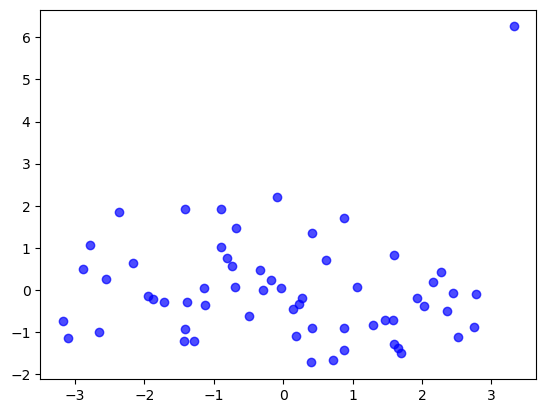

In [88]:
# Scatter plot of PC1 vs PC2
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.7, color='blue', label='Data points')

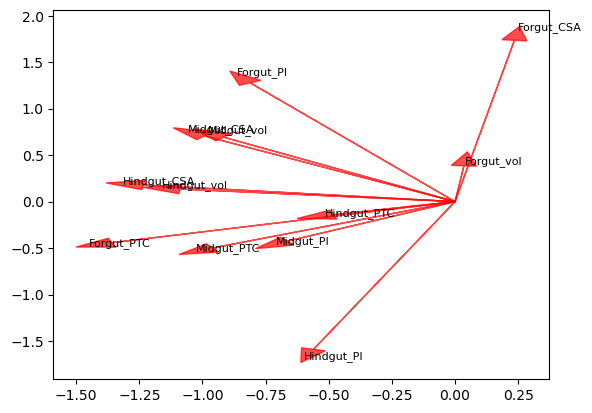

In [89]:
# Add feature vectors (arrows)
for i, feature in enumerate(selected_columns):
    plt.arrow(0, 0, loadings[i, 0] * 3, loadings[i, 1] * 3, color='red', alpha=0.7, head_width=0.1)
    plt.text(loadings[i, 0] * 3.2, loadings[i, 1] * 3.2, feature, color='black', fontsize=8)


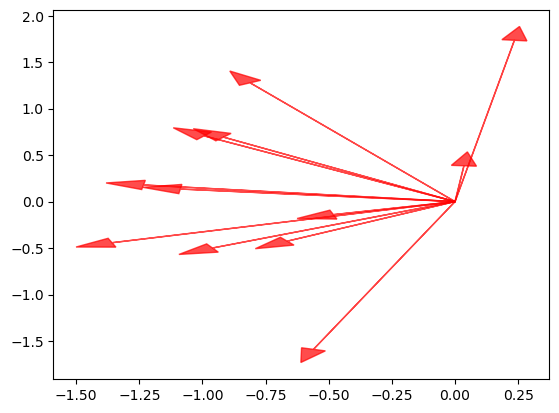

In [91]:
# Modify feature vectors (arrows)
for i, feature in enumerate(selected_columns):
    plt.arrow(0, 0, loadings[i, 0] * 3, loadings[i, 1] * 3, color='red', alpha=0.7, head_width=0.1)

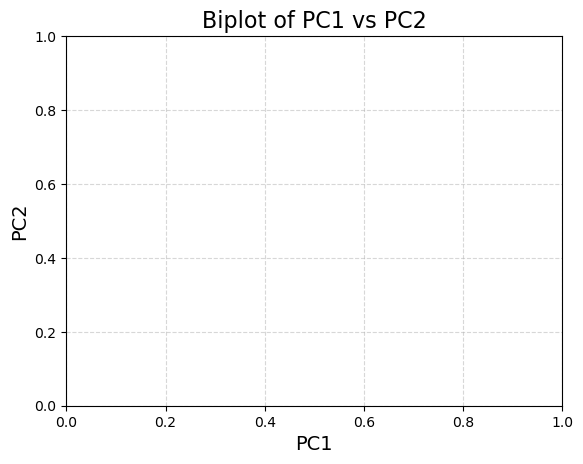

In [93]:
# Labels and Title
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.title("Biplot of PC1 vs PC2", fontsize=16)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.5)

In [92]:
plt.show()